<a id="A"></a>
# <div style="text-align:center; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:115%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> Fashion MNIST </b></div>


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black"> 
The Fashion-MNIST dataset retrieved from Zalando's article images consists of 28x28 grayscale images with 10 association of distinct classes. The training and the test set consists of 60,000 and 10,000 examples respectively. Additionally, it consists of images represented as pixel vectors, and the primary objective is to train a CNN model to recognize and classify these images accurately.
</span>


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Import Dependencies </b></div>


In [30]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scikeras.wrappers import KerasClassifier, KerasRegressor
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

from PIL import ImageFont
from IPython.display import Image
import visualkeras
import warnings
warnings.filterwarnings('ignore')


Module Alterations: scikeras

- from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
+ from scikeras.wrappers import KerasClassifier, KerasRegressor

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Load dataset </b></div>


In [2]:
df_train = pd.read_csv("dataset/fashion-mnist_train.csv")
df_test = pd.read_csv("dataset/fashion-mnist_test.csv")


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Feature Analysis </b></div>


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Acquire pixel size
</span>


In [3]:
df_train.shape[1]

785

<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Define the characteristic properties
</span>


In [48]:
# 28*28 = 784
image_height = 28
image_width = 28
batch_size = 32
epochs = 15


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Analyze dataset structure
</span>


In [5]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_train.label.describe()


count    60000.000000
mean         4.500000
std          2.872305
min          0.000000
25%          2.000000
50%          4.500000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [13]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Visualize images per class
</span>


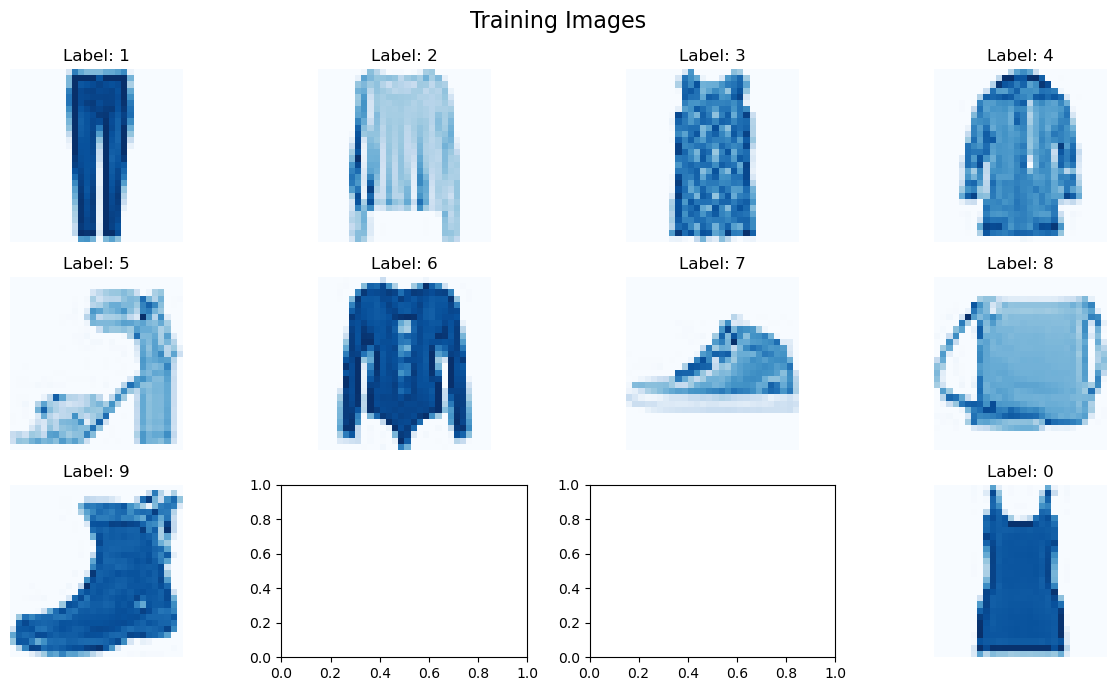

In [9]:
# Plot random img per class
def plot_rand_image(df, max_length):
    fig, axes = plt.subplots(3, 4, figsize=(12, 7))
    axes = axes.flatten()

    for i in range(df_train.label.min(), df_train.label.max()+1):
        get_item = df_train.where(df.label == i).dropna()
        item_idx_list = get_item.index.values.tolist()
        rand_image = random.choice(item_idx_list)
        
        image = df.iloc[rand_image, 1:].values #index 0 is label, hence starts with 1
        label = i
        image_data = image.reshape(image_height, image_width)

        axes[i-1].imshow(image_data, cmap='Blues')
        axes[i-1].set_title(f'Label: {label}')
        axes[i-1].axis('off') 

    plt.suptitle("Training images", size=16)
    plt.tight_layout()
    plt.axis('off')
    plt.show()
    

max_length = df_train.shape[0]
plot_rand_image(df_train, max_length)

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Data cleaning </b></div>


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Inquire entire shape
</span>


In [10]:
print(f'Train dataset: {df_train.shape}')
print(f'Test dataset: {df_test.shape}')


Train dataset: (60000, 785)
Test dataset: (10000, 785)


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Check for null values
</span>


In [11]:
print(f"Null samples from the Training set: {df_train.isnull().sum().sum()}")
print(f"Null samples from the Test set: {df_test.isnull().sum().sum()}")


Null samples from the Training set: 0
Null samples from the Test set: 0


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Drop null values
</span>


In [107]:
# Dropping Null values directly from the dataset
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Recheck if null values are present
</span>


In [43]:
print(f"Duplicate values in Training set: {df_train.duplicated().sum()}")
print(f"Duplicate values in Testing set: {df_test.duplicated().sum()}")


Duplicate values in Training set: 43
Duplicate values in Testing set: 1


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Check and drop duplicates
</span>


<span style="font-family:Cambria; color:#0261ab; font-size: 17px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    It is generally not necessary to truncate duplicates in the test set because the primary purpose of the test is to evaluate the performance of the trained model. Additionally, since the count of duplicates are low, they may not have a significant impact on the model's evaluation. Therefore, dropping duplicates in test set is not necessary.
</span>


In [32]:
train_duplicates = df_train.duplicated().sum()
test_duplicates = df_test.duplicated().sum()

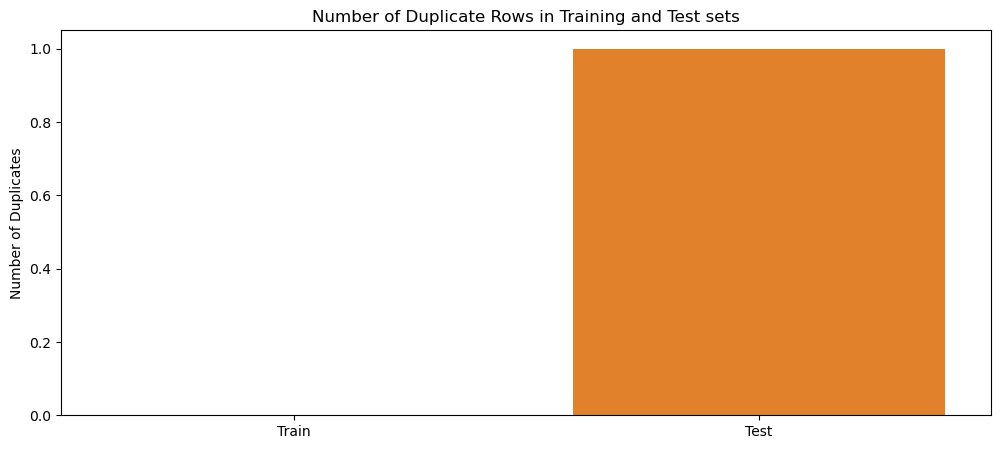

In [40]:
fig, ax = plt.subplots(figsize=(12,5))
data = {'Train': train_duplicates, 'Test': test_duplicates}
sns.barplot(x=list(data.keys()), y=list(data.values()), ax=ax)

ax.set_title('Number of Duplicate Rows in Training and Test sets')
ax.set_ylabel('Number of Duplicates')

plt.show()

In [41]:
df_train.drop_duplicates(inplace=True)
print(f"Duplicate values in Training set: {df_train.duplicated().sum()}")

Duplicate values in Training set: 0


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Illustrate the distribution of clothing
</span>


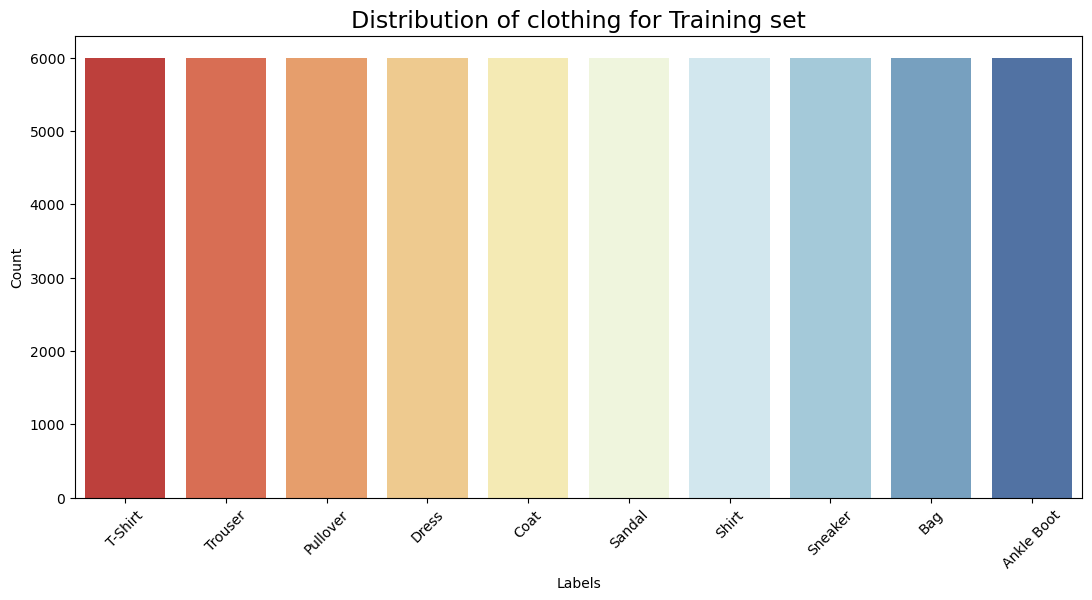

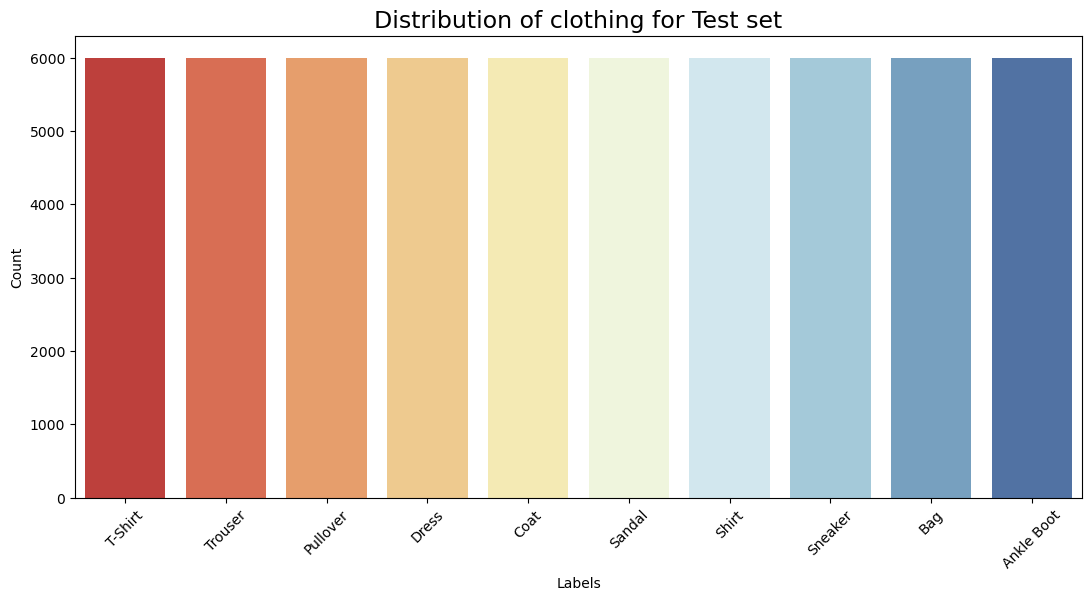

In [43]:
# Distribution visualization
def distribution_clothing(df, dataset_label):
    label_map = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

    plt.figure(figsize=(13,6))
    sns.countplot(df_train, x='label', palette='RdYlBu')
    plt.title(f"Distribution of clothing for {dataset_label} set", size=17)
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.xticks(range(len(label_map)), label_map, rotation=45)
    plt.show()

distribution_clothing(df_train, dataset_label='Training')
distribution_clothing(df_test, dataset_label='Test')


<span style="font-family:Cambria; color:#0261ab; font-size: 17px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    Since the classes are evenly distributed, there is no need for any modification to balance the classes.
</span>


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Feature Transformation </b></div>


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Allocate data between train and test set
</span>


In [16]:
X_train = df_train.drop(columns='label', axis=1)
y_train = df_train['label']

X_test = df_test.drop(columns='label')
y_test = df_test['label']


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Feature transformation
</span>


In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), slice(0, 784)) 
])

onehot_encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = onehot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = onehot_encoder.transform(y_test.values.reshape(-1, 1))


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Model Construction </b></div>


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • CNN Model
</span>


In [18]:
def create_cnn_model(input_shape):
    model = models.Sequential()        
    
    # Reshape input to 28x28x1 for the convolutional layers
    model.add(layers.Reshape((28, 28, 1), input_shape=input_shape))
                              
    # Convolution + Pooling layers
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))
    
    # Flatten before dense layers
    model.add(layers.Flatten())
    
    # Fully connected layers
#     model.add(layers.Dense(256, activation='relu'))
#     model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for Fashion MNIST
    
    # Compile the model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model                     
    

<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Visualization of CNN Network
</span>


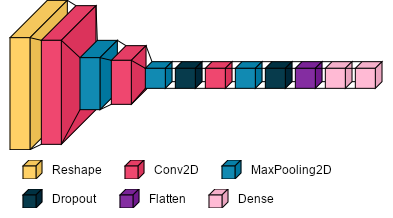

In [31]:
input_shape = (784,)

font = ImageFont.truetype("arial.ttf", 12)  
visualkeras.layered_view(create_cnn_model(input_shape), to_file='cnn_architecture.png', legend=True, font=font).show()
Image("cnn_architecture.png")

In [52]:
model = create_cnn_model(input_shape)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_7 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,354 (255.29 KB)

 Trainable params: 65,354 (255.29 KB)

 Non-trainable params: 0 (0.00 B)

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Model Training </b></div>


In [78]:
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), 
                    batch_size=batch_size, epochs=epochs, verbose=2)


Epoch 1/15
1874/1874 - 10s - 5ms/step - accuracy: 0.8906 - loss: 0.2926 - val_accuracy: 0.8921 - val_loss: 0.3049
Epoch 2/15
1874/1874 - 10s - 5ms/step - accuracy: 0.8946 - loss: 0.2846 - val_accuracy: 0.8901 - val_loss: 0.3156
Epoch 3/15
1874/1874 - 10s - 5ms/step - accuracy: 0.8926 - loss: 0.2886 - val_accuracy: 0.8934 - val_loss: 0.3030
Epoch 4/15
1874/1874 - 10s - 5ms/step - accuracy: 0.8924 - loss: 0.2905 - val_accuracy: 0.8935 - val_loss: 0.3035
Epoch 5/15
1874/1874 - 10s - 5ms/step - accuracy: 0.8955 - loss: 0.2837 - val_accuracy: 0.8925 - val_loss: 0.3130
Epoch 6/15
1874/1874 - 10s - 5ms/step - accuracy: 0.8926 - loss: 0.2882 - val_accuracy: 0.8927 - val_loss: 0.3061
Epoch 7/15
1874/1874 - 10s - 5ms/step - accuracy: 0.8960 - loss: 0.2822 - val_accuracy: 0.8955 - val_loss: 0.3113
Epoch 8/15
1874/1874 - 10s - 5ms/step - accuracy: 0.8962 - loss: 0.2817 - val_accuracy: 0.8932 - val_loss: 0.3033
Epoch 9/15
1874/1874 - 10s - 5ms/step - accuracy: 0.8951 - loss: 0.2807 - val_accuracy: 

In [79]:
model.evaluate(X_test, y_test_encoded, batch_size=batch_size, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.8902 - loss: 0.3152


[0.31515759229660034, 0.8902000188827515]

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Evaluation </b></div>


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Statistical Evaluation
</span>


In [80]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [87]:
mean_base_acc = np.mean(history.history['accuracy'])
mean_val_acc = np.mean(history.history['val_accuracy'])

mean_base_loss = np.mean(history.history['loss'])
mean_val_loss = np.mean(history.history['val_loss'])

print(f'Mean base accuracy: {mean_base_acc}')
print(f'Mean validation accuracy: {mean_val_acc}\n')

print(f'Mean base loss: {mean_base_loss}')
print(f'Mean validation loss: {mean_val_loss}')


Mean base accuracy: 0.8957619627316793
Mean validation accuracy: 0.8928666631380717

Mean base loss: 0.28228953083356223
Mean validation loss: 0.3096356511116028


<span style="font-family:Cambria; color:#0261ab; font-size: 18px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 
    • Visual Evaluation
</span>


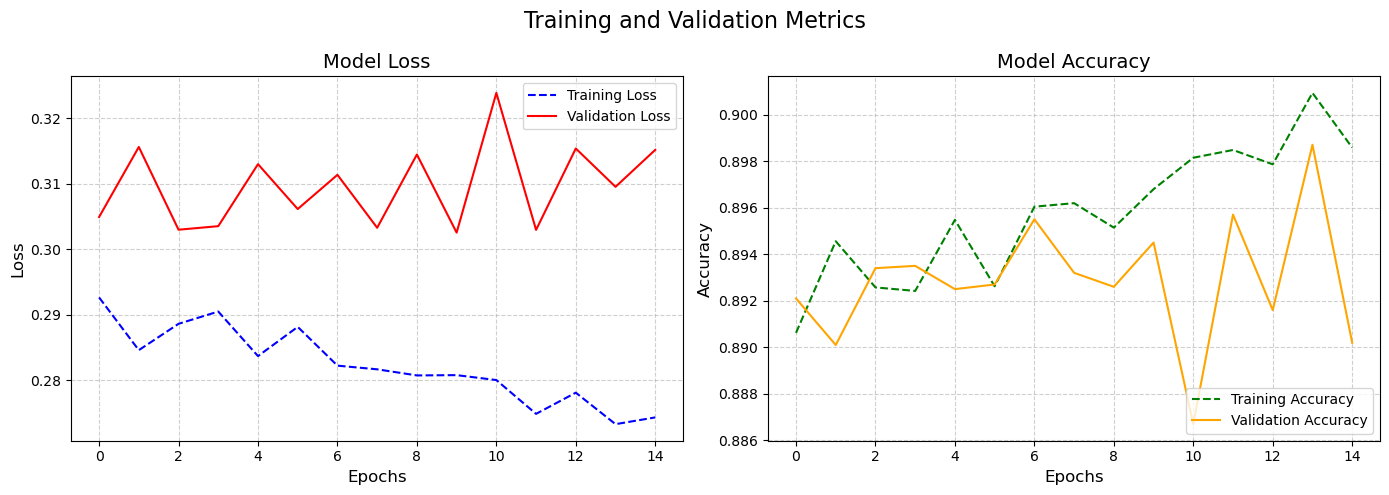

In [82]:
# Plotting Accuracy & Loss Curves
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
axs[0].plot(history.history['loss'], color='b', label='Training Loss', linestyle='--')
axs[0].plot(history.history['val_loss'], color='r', label='Validation Loss', linestyle='-')
axs[0].set_title('Model Loss', fontsize=14)
axs[0].set_xlabel('Epochs', fontsize=12)
axs[0].set_ylabel('Loss', fontsize=12)
axs[0].legend(loc='upper right', fontsize=10)
axs[0].grid(True, linestyle='--', alpha=0.6)

# Plot Accuracy
axs[1].plot(history.history['accuracy'], color='g', label='Training Accuracy', linestyle='--')
axs[1].plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy', linestyle='-')
axs[1].set_title('Model Accuracy', fontsize=14)
axs[1].set_xlabel('Epochs', fontsize=12)
axs[1].set_ylabel('Accuracy', fontsize=12)
axs[1].legend(loc='lower right', fontsize=10)
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Training and Validation Metrics', fontsize=16)
plt.tight_layout()
plt.show()

In [89]:
np.random.choice(X_test.shape[0], num_images, replace=False)

array([5037, 8683, 3887, 7488, 5863, 7842, 7672, 8181, 6975, 2073])

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Random Test Prediction </b></div>


In [102]:
X_test.iloc[[0, 2]]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0


In [100]:
y_test_encoded[[0, 1]] 

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


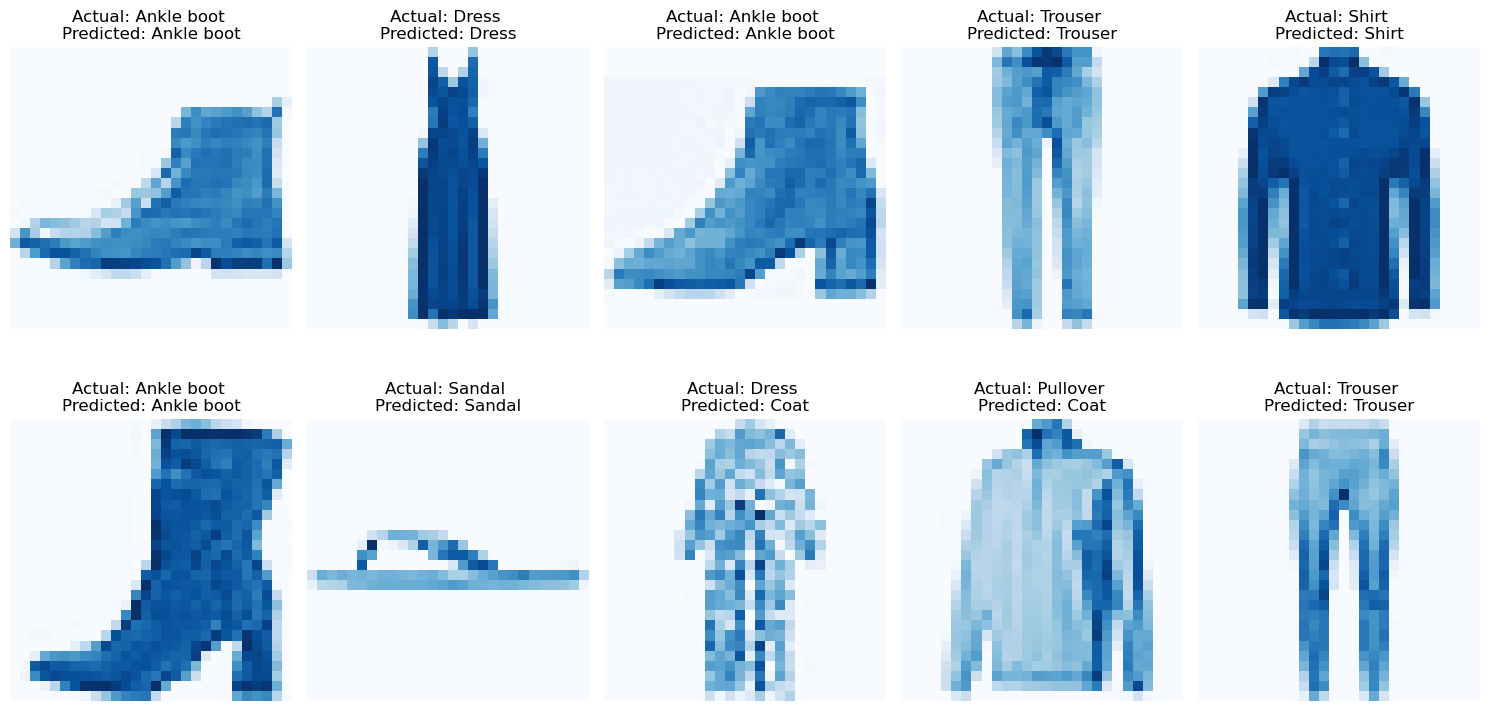

In [106]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_images = 10
np_x_test = np.array(X_test)

random_indices = np.random.choice(np_x_test.shape[0], num_images, replace=False)
random_images = np_x_test[random_indices] 
random_labels = y_test_encoded[random_indices]  

predicted_labels = model.predict(random_images)  
predicted_classes = np.argmax(predicted_labels, axis=1)
true_classes = np.argmax(random_labels, axis=1)

fig, axs = plt.subplots(2, 5, figsize=(15, 8))

for i, ax in enumerate(axs.flat):
    image = random_images[i].reshape(28, 28)  
    
    ax.imshow(image, cmap='Blues')
    ax.axis('off')  
    
    true_label_name = labels[true_classes[i]]
    predicted_label_name = labels[predicted_classes[i]]
    ax.set_title(f"Actual: {true_label_name} \nPredicted: {predicted_label_name}", fontsize=12)

plt.tight_layout()
plt.show()